## **Business Problem Understanding**

### **Context**
Sebuah bank di Portugal menjalankan kampanye pemasaran melalui **telemarketing** untuk menawarkan **produk deposito berjangka (*term deposit*)**. Dalam kampanye ini, nasabah dihubungi satu per satu melalui panggilan telepon untuk menerima penawaran produk.

Namun, salah satu tantangan utama adalah **tingginya biaya operasional** akibat durasi panggilan yang panjang, terutama ketika dilakukan dalam skala besar. Meskipun panggilan telemarketing penting untuk menjangkau semua nasabah, **tidak semua interaksi berujung pada pembukaan deposito**, sehingga waktu dan biaya bisa terbuang sia-sia.

Selama kampanye berlangsung, berbagai data dikumpulkan, seperti:

1. Profil nasabah (umur, pekerjaan, status kredit, dll.)

2. Riwayat kampanye sebelumnya

3. Durasi panggilan (`duration`)

4. Biaya estimasi panggilan (`call_fee`)

Variabel `duration` terbukti memiliki **korelasi kuat dengan hasil kampanye (`y`)**, dan dapat digunakan untuk menyusun **strategi efisiensi durasi**, tanpa harus mengorbankan cakupan nasabah.

Perusahaan ingin mengetahui bagaimana durasi percakapan dapat dimanfaatkan secara **efisien** agar:

1. Tidak membuang biaya untuk nasabah yang tidak tertarik,

2. Tapi tetap mengoptimalkan konversi pada nasabah yang potensial membuka deposito.

Target
* `y = "no"`: Nasabah **tidak membuka** deposito
* `y = "yes"`: Nasabah **membuka deposito**

### **Problem Statement**
Bank tetap ingin **menghubungi seluruh nasabah,** namun menghadapi risiko:

1. **Durasi panggilan yang terlalu panjang** pada nasabah yang tidak tertarik

2. **Pemborosan biaya komunikasi** dan beban waktu bagi agen telemarketing

Oleh karena itu, perlu diterapkan strategi **cut-off durasi** (`duration_cut_off`) yang optimal, yaitu batas waktu maksimal percakapan berdasarkan hasil historis dan potensi konversi nasabah.

#### **Berdasarkan hasil analisis data:**

1. **Total biaya aktual (tanpa cut-off):** €45.359,00

2. **Total biaya setelah cut-off:** €24.857,60

3. **Penghematan biaya: €20.501,40 (45%)**

#### **Selain itu, dari sisi waktu:**

1. **Total durasi aktual panggilan:** 10.638.243 detik (**177.304 menit**)

2. **Total durasi setelah cut-off:** 5.991.325 detik (**99.855 menit**)

3. **Penghematan waktu: 4.646.918 detik** (**77.448 menit) (43,68%)**

Sama dengan **1.290 jam telepon**, atau hampir **161 hari kerja agen** (8 jam per hari)

### **Goals**
Proyek ini bertujuan untuk:

1. **Meningkatkan efisiensi kampanye telemarketing** tanpa mengorbankan jangkauan nasabah

2. **Menetapkan batas durasi optimal** (`duration_cut_off`) berdasarkan data historis

3. **Menghemat biaya dan waktu** melalui strategi cut-off, khususnya pada nasabah yang tidak tertarik

4. Membangun **model prediktif** untuk membantu mengenali nasabah yang potensial membuka deposito (`y = "yes"`)

### **Analytic Approach**
Pendekatan yang dilakukan meliputi:

1. **Analisis eksploratif** terhadap variabel-variabel yang berkorelasi dengan konversi (`y`)

2. Penambahan fitur biaya (`call_fee`) dan `duration_cut_off` sebagai strategi efisiensi

3. Penerapan **model machine learning** untuk memprediksi apakah nasabah akan membuka deposito

4. Evaluasi strategi cut-off dalam menurunkan biaya dan durasi panggilan

### **Metric Evaluation**

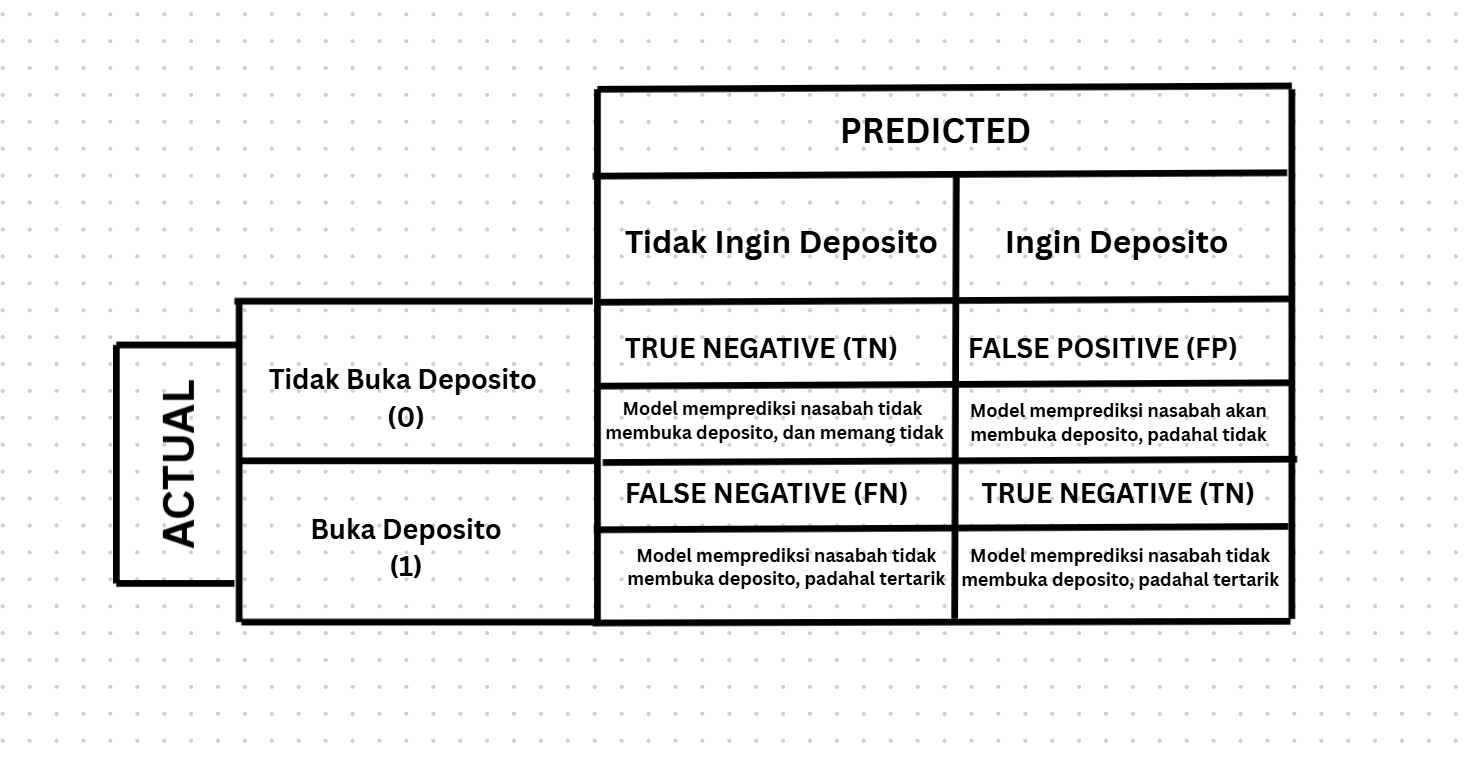

|                                     | **PREDICTED: Tidak buka deposito (0)**                                                               | **PREDICTED: Buka deposito (1)**                                                              |
| ----------------------------------- | ---------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| **ACTUAL: Tidak buka deposito (0)** | **True Negative (TN)**<br>Model memprediksi nasabah tidak membuka deposito, dan memang tidak membuka | **False Positive (FP)**<br>Model memprediksi nasabah akan membuka deposito, padahal tidak     |
| **ACTUAL: Buka deposito (1)**       | **False Negative (FN)**<br>Model memprediksi nasabah tidak membuka deposito, padahal tertarik        | **True Positive (TP)**<br>Model memprediksi nasabah akan membuka deposito, dan memang membuka |


#### **Error Analysis**
Type 1 Error (False Positive)

❗ Model bilang nasabah akan tertarik, tapi ternyata tidak.

💸 Konsekuensi: Biaya telepon terbuang sia-sia, waktu agent habis, pulsa & tenaga terbuang.

Type 2 Error (False Negative)

❗ Model bilang nasabah tidak tertarik, padahal sebenarnya tertarik.

📉 Konsekuensi: Kehilangan nasabah potensial yang seharusnya bisa buka deposito → rugi peluang bisnis.

#### **Trade-off & Strategi**

Berdasarkan konsekuensinya:

1. Kita **tidak ingin terlalu banyak False Positives** → buang biaya

2. Tapi juga **tidak boleh terlalu banyak False Negatives** → kehilangan target prospek

Artinya, model perlu seimbang:

1. **Precision tinggi** → agar prediksi `ya` benar-benar akurat

2. **Recall tinggi** → agar tidak melewatkan nasabah potensial

#### **Metrik Evaluasi Utama**

Karena target `y` bersifat biner (`"yes"` / `"no"`), model akan dievaluasi menggunakan:

1. **Precision**: Untuk menghindari menyasar nasabah yang tidak tertarik (biaya sia-sia)

2. **Recall**: Untuk tidak melewatkan nasabah potensial

3. **F1-score**: Keseimbangan antara precision dan recall

4. **PR Curve & ROC AUC**: Khususnya karena data bersifat **imbalanced**

#### **Risiko yang harus dihindari:**

1. **False Positive** → Biaya percakapan terbuang (salah prediksi ya)

2. **False Negative** → Peluang konversi hilang (salah prediksi tidak)

#### **Kesimpulan**
Untuk kampanye telemarketing deposito:

Kita butuh model klasifikasi yang dapat **mengenali nasabah potensial** membuka deposito, **sambil menekan jumlah telepon yang sia-sia**.

## **Data Understanding**

### **Sumber Data**

Sumber data
1. Tautan: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset/code
2. Judul: ***Bank marketing campaigns dataset | Opening Deposit***

Note:
1. **Dataset bersifat imbalanced**

    * Target `y` didominasi oleh label `"no"` (nasabah tidak membuka deposito)

    * Hanya sebagian kecil data yang memiliki label `"yes"`

    * Implikasi: perlu teknik penanganan imbalance dalam modeling (misalnya oversampling, undersampling, atau penyesuaian metrik evaluasi)

2. **Fitur dominan kategorikal**

    * Banyak fitur berupa data kategorikal:

        * **Nominal**: `job`, `contact`, `education`, `marital`, `poutcome`

        * **Ordinal (berurutan)**: `month`, `day_of_week`

    * Perlu proses encoding yang sesuai, misalnya one-hot encoding atau ordinal encoding

3. Fitur numerik merepresentasikan intensitas kampanye

    * Contoh:

        * `campaign`: jumlah kontak selama kampanye ini

        * `pdays`: hari sejak terakhir dihubungi

        * `previous`: jumlah kontak pada kampanye sebelumnya

    * Dapat digunakan untuk mengukur "ketekunan" dalam kampanye pemasaran

4. **Setiap baris merepresentasikan 1 interaksi telemarketing**

    * Unit observasi adalah **panggilan telepon per nasabah**

    * Berarti nasabah bisa saja dihubungi lebih dari satu kali

5. **Fitur `duration` mengandung informasi pasca-panggilan**

    * Durasi panggilan hanya diketahui **setelah** panggilan terjadi

    * Oleh karena itu, **tidak boleh digunakan sebagai fitur prediktor**

    * Penggunaan `duration` sebagai input akan menyebabkan **data leakage**

6. **Fitur `call_fee` dan `duration_cut_off` diturunkan dari data asli**

    * Fitur ini merupakan hasil rekayasa fitur (*feature engineering*)

    * Sangat berguna untuk analisis biaya, namun harus digunakan hati-hati saat modeling

7. **Terdapat nilai `"unknown"` dalam beberapa kolom**

    * Fitur seperti `job`, `education`, `contact`, `default` memiliki kategori `"unknown"`

    * Perlu ditangani secara eksplisit (misalnya dimasukkan sebagai kategori sendiri atau diganti/diimputasi)

### **Sumber Data**

Sumber data
1. Tautan: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset/code
2. Judul: ***Bank marketing campaigns dataset | Opening Deposit***

Note:
1. **Dataset bersifat imbalanced**

    * Target `y` didominasi oleh label `"no"` (nasabah tidak membuka deposito)

    * Hanya sebagian kecil data yang memiliki label `"yes"`

    * Implikasi: perlu teknik penanganan imbalance dalam modeling (misalnya oversampling, undersampling, atau penyesuaian metrik evaluasi)

2. **Fitur dominan kategorikal**

    * Banyak fitur berupa data kategorikal:

        * **Nominal**: `job`, `contact`, `education`, `marital`, `poutcome`

        * **Ordinal (berurutan)**: `month`, `day_of_week`

    * Perlu proses encoding yang sesuai, misalnya one-hot encoding atau ordinal encoding

3. Fitur numerik merepresentasikan intensitas kampanye

    * Contoh:

        * `campaign`: jumlah kontak selama kampanye ini

        * `pdays`: hari sejak terakhir dihubungi

        * `previous`: jumlah kontak pada kampanye sebelumnya

    * Dapat digunakan untuk mengukur "ketekunan" dalam kampanye pemasaran

4. **Setiap baris merepresentasikan 1 interaksi telemarketing**

    * Unit observasi adalah **panggilan telepon per nasabah**

    * Berarti nasabah bisa saja dihubungi lebih dari satu kali

5. **Fitur `duration` mengandung informasi pasca-panggilan**

    * Durasi panggilan hanya diketahui **setelah** panggilan terjadi

    * Oleh karena itu, **tidak boleh digunakan sebagai fitur prediktor**

    * Penggunaan `duration` sebagai input akan menyebabkan **data leakage**

6. **Fitur `call_fee` dan `duration_cut_off` diturunkan dari data asli**

    * Fitur ini merupakan hasil rekayasa fitur (*feature engineering*)

    * Sangat berguna untuk analisis biaya, namun harus digunakan hati-hati saat modeling

7. **Terdapat nilai `"unknown"` dalam beberapa kolom**

    * Fitur seperti `job`, `education`, `contact`, `default` memiliki kategori `"unknown"`

    * Perlu ditangani secara eksplisit (misalnya dimasukkan sebagai kategori sendiri atau diganti/diimputasi)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display, HTML
from tabulate import tabulate

In [3]:
file_path = "../data/revision/bank-additional-call-fee.csv"
df = pd.read_csv(file_path, sep=';') 

### **Attribute Information**

In [4]:
# 1. Ambil tipe data asli dari DataFrame
df_dtypes = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
df_dtypes.columns = ['Attribute', 'Data Type']

# 2. Buat deskripsi tambahan manual (dari informasi yang Anda berikan)
deskripsi_manual = [
    ["age", "Numerik", "Usia klien"],
    ["job", "Kategorikal", "Jenis Pekerjaan Klien"],
    ["marital", "Kategorikal", "Status Pernikahan Klien"],
    ["education", "Kategorikal", "Tingkat pendidikan klien"],
    ["default", "Kategorikal", "Status kredit klien"],
    ["housing", "Kategorikal", "Status apakah klien memiliki pinjamanan perumahan"],
    ["loan", "Kategorikal", "Status apakah klien memiliki pinjaman pribadi"],
    ["contact", "Kategorikal", "Jenis komunikasi kontak terakhir"],
    ["month", "Kategorikal", "Bulan kontak terakhir dengan klien dalam tahun ini"],
    ["day_of_week", "Kategorikal", "Hari dalam seminggu kontak terakhir dengan klien"],
    ["duration", "Numerikal", "Durasi kontak terakhir dengan klien dalam detik"],
    ["campaign", "Numerikal", "Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini"],
    ["pdays", "Numerikal", "Jumlah hari sejak klien terakhir kali dihubungi dari kampanye sebelumnya"],
    ["previous", "Numerikal", "Jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini"],
    ["poutcome", "Kategorikal", "Hasil dari kampanye pemasaran sebelumnya"],
    ["emp.var.rate", "Numerikal", "Tingkat variasi pekerjaan"],
    ["cons.price.idx", "Numerikal", "Indeks harga konsumen"],
    ["cons.conf.idx", "Numerikal", "Indeks kepercayaan konsumen"],
    ["euribor3m", "Numerikal", "Tingkat euribor 3 bulan"],
    ["nr.employed", "Numerikal", "Jumlah karyawan"],
    ["y", "Kategorikal", "Status apakah klien telah berlangganan deposito berjangka?"],
    ["call_fee", "Numerikal", "Biaya Penggunaan Telepon"],
    ["duration_cut_off", "Numerikal", "Durasi kontak \"cut off\" dengan klien dalam detik"],
    ["call_fee_cut_off", "Numerikal", "Biaya Penggunaan \"cut off\" Telepon"]
]

df_deskripsi = pd.DataFrame(deskripsi_manual, columns=["Attribute", "Jenis Data", "Deskripsi"])

# 3. Gabungkan kedua DataFrame berdasarkan kolom 'Attribute'
df_info_akhir = pd.merge(df_dtypes, df_deskripsi, on="Attribute", how="left")


# 4. Tampilkan hasil
# Buat HTML dari DataFrame tanpa index
html_table = df_info_akhir.to_html(index=False)

# Tambahkan atribut style langsung ke tag <th> dan <td>
html_table = html_table.replace(
    "<th>", '<th style="text-align: center; padding: 8px; background-color: #f2f2f2;">'
).replace(
    "<td>", '<td style="text-align: left; padding: 6px;">'
)

# Bungkus tabel agar tampil di tengah layar
html_centered = f"""
<div style="display: flex; justify-content: center;">
    {html_table}
</div>
"""

# Tampilkan hasil
display(HTML(html_centered))

Attribute,Data Type,Jenis Data,Deskripsi
age,int64,Numerik,Usia klien
job,object,Kategorikal,Jenis Pekerjaan Klien
marital,object,Kategorikal,Status Pernikahan Klien
education,object,Kategorikal,Tingkat pendidikan klien
default,object,Kategorikal,Status kredit klien
housing,object,Kategorikal,Status apakah klien memiliki pinjamanan perumahan
loan,object,Kategorikal,Status apakah klien memiliki pinjaman pribadi
contact,object,Kategorikal,Jenis komunikasi kontak terakhir
month,object,Kategorikal,Bulan kontak terakhir dengan klien dalam tahun ini
day_of_week,object,Kategorikal,Hari dalam seminggu kontak terakhir dengan klien


### **Dimesi Data**

In [5]:
df_shape = df.shape
df_dtypes = df.dtypes
df_head = df.head()

In [6]:
baris, kolom = df.shape
display(Markdown(f"**Dataset ini mempunyai:**\n- Jumlah data/baris: `{baris}`\n- Jumlah atribut/kolom: `{kolom}`"))

**Dataset ini mempunyai:**
- Jumlah data/baris: `41188`
- Jumlah atribut/kolom: `24`

### **Cuplikan Data**

In [7]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.7,170,0.3
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.1,60,0.1


## **Pre Processing**

#### **Remove Unused Data**

kita akan melakukan penghapusan kolom 'duration' beserta turunannya seperti 'call_off', 'duration_cut_off', dan 'call_fee_cut_off', karena kolom ini dapat menyebabkan data leakage jika digunakan sebagai fitur untuk model ML. hal ini dapat dilihat dibawah ini

In [8]:
df['y_numeric'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
correlation = df['duration'].corr(df['y_numeric'])
print(f"Korelasi antara duration dan y: {correlation:.3f}")
duration_yes = df[df['y'] == 'yes']['duration'].describe()
duration_no = df[df['y'] == 'no']['duration'].describe()
print("\nStatistik duration untuk y = yes:\n", duration_yes)
print("\nStatistik duration untuk y = no:\n", duration_no)

Korelasi antara duration dan y: 0.405

Statistik duration untuk y = yes:
 count    4640.000000
mean      553.191164
std       401.171871
min        37.000000
25%       253.000000
50%       449.000000
75%       741.250000
max      4199.000000
Name: duration, dtype: float64

Statistik duration untuk y = no:
 count    36548.000000
mean       220.844807
std        207.096293
min          0.000000
25%         95.000000
50%        163.500000
75%        279.000000
max       4918.000000
Name: duration, dtype: float64


terlihat disini bahwa kolom 'duration' memiliki korelasi yang cukup kuat dengan keputusan nasabah melakukan deposito atau tida (kolom 'y' ), sesuai dengan tujuan utama kita, yaitu membangun model machine learning yang dapat memprediksi seorang nasabah akan melakukan deposito sebelum panggilan dilakukan, sehingga otomatis kolom duration akan memyebabkan terjadinya data leakage, alasannya cukup  sederhana, yaitu durasi sendiri belum diketahui ketika model melakukan prediksi. begitu juga dengan kolom turunan duration seperti 'call_off', 'duration_cut_off', dan 'call_fee_cut_off' yang dibuat melalui duration juga

In [9]:
# menghapus kolom duration dan turunannya agar mencegah terjadinya data leakage
columns_to_drop = ['duration', 'call_fee', 'duration_cut_off', 'call_fee_cut_off']
df_cleaned = df.drop(columns=columns_to_drop)

### **Data Duplikasi**

#### **Pemeriksaan Data Duplikasi**

In [7]:
duplicate_rows_size = df.duplicated(keep=False).sum()
display(Markdown(f"Dataset ini mempunyai **{duplicate_rows_size}** data duplikat."))

Dataset ini mempunyai **24** data duplikat.

In [8]:
# Ambil baris-baris yang duplikat
duplicate_rows = df[df.duplicated(keep=False)]

# Tampilkan seluruh baris duplikat dalam bentuk tabel
display(duplicate_rows) 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0.3,120,0.2
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0.3,120,0.2
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,0.2,90,0.2
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,0.2,90,0.2
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,1.8,170,0.9
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,1.8,170,0.9
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0.3,60,0.3
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0.3,60,0.3
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,0.9,120,0.6
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,0.9,120,0.6


#### **Penghapusan Data Duplikasi**

In [9]:
output_path = "../data/revision/bank-additional-full-no-duplicates.csv"

In [10]:
# Remove duplicate rows and keep only the first occurrence
df_no_duplicates = df.drop_duplicates(keep='first')

# Save the cleaned DataFrame to a new CSV file
df_no_duplicates.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-no-duplicates.csv**

#### **Pembacaan Ulang DataFrame**

In [11]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


In [12]:
baris, kolom = df.shape
display(Markdown(f"**Setelah Pemeriksaan Duplikasi Data. Dataset ini mempunyai:**\n- Jumlah data/baris: `{baris}`\n- Jumlah atribut/kolom: `{kolom}`"))

**Setelah Pemeriksaan Duplikasi Data. Dataset ini mempunyai:**
- Jumlah data/baris: `41176`
- Jumlah atribut/kolom: `24`

### **Perubahan Atribut** 

In [13]:
output_path = "../data/revision/bank-additional-full-perubahan-atribut.csv"

Untuk mempermudah analisis numerik dan pemodelan prediktif, dilakukan konversi nilai kategorikal pada atribut `month` dan `day_of_week` menjadi representasi numerik.

* **Atribut `month` yang semula berupa nama bulan (`"jan"`, `"feb"`, ..., `"dec"`) diubah menjadi angka 1–12**.

* **Atribut `day_of_week` yang semula berupa nama hari (`"mon"`, `"tue"`, ..., `"fri"`) diubah menjadi angka 1–5**.

#### **Perubahan data `month`**

In [14]:
print(df['day_of_week'].unique())

['mon' 'tue' 'wed' 'thu' 'fri']


In [15]:
# Map nama bulan ke angka
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(month_mapping)
Markdown("Perubahan data `month` selesai dilakukan")

Perubahan data `month` selesai dilakukan

#### **Perubahan data `day_of_week`**

In [16]:
# Map nama hari ke angka (opsi: Senin = 1 atau Minggu = 0)
# Pastikan nilai huruf kecil dan tanpa spasi
df['day_of_week'] = df['day_of_week'].astype(str).str.strip().str.lower()

# Lakukan mapping
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3,
    'thu': 4, 'fri': 5
}

df['day_of_week'] = df['day_of_week'].map(day_mapping)
Markdown("Perubahan data `day_of_week` selesai dilakukan")

Perubahan data `day_of_week` selesai dilakukan

In [17]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


#### **Penyimpanan Data Perubahan**

In [18]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-perubahan-atribut.csv**

#### **Pembacaan Ulang DataFrame**

In [19]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


### **Perbaikan Missing Value**

In [20]:
output_path = "../data/revision/bank-additional-full-missing-value.csv"

Pada dataset ini, nilai hilang tidak ditandai dengan `NaN` secara eksplisit, melainkan dengan string `"unknown"`.
Oleh karena itu, untuk mempermudah proses analisis visual menggunakan pustaka/*library* seperti `missingno` dan memanfaatkan fungsi imputasi standar dari pandas atau scikit-learn, seluruh nilai `"unknown"` akan digantikan dengan `np.nan`.

Langkah ini penting untuk memastikan bahwa semua teknik penanganan missing value dapat berjalan dengan baik dan akurat.

#### **Perubahan ke null value**

In [21]:
import numpy as np

# Ganti semua 'unknown' menjadi np.nan di seluruh DataFrame
df.replace('unknown', np.nan, inplace=True)

Markdown("Perubahan data `\"unknown\"` ke `null` selesai dilakukan")

Perubahan data `"unknown"` ke `null` selesai dilakukan

#### **Penyimpanan Data Perubahan**

In [22]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

Data akan disimpan di **../data/revision/bank-additional-full-missing-value.csv**

#### **Pembacaan Ulang DataFrame**

In [23]:
df = pd.read_csv(output_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,call_fee,duration_cut_off,call_fee_cut_off
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.5,170,0.3
1,57,services,married,high.school,NaN,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.4,170,0.3
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.3,120,0.2
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.6,170,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1.8,300,1.5
41172,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2.1,170,0.9
41173,56,retired,married,university.degree,no,yes,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1.2,170,0.9
41174,44,technician,married,professional.course,no,no,no,cellular,11,5,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2.4,300,1.5


#### **Pengecekan Nilai null**

In [24]:
output_path = "../data/revision/bank-additional-full-clean.csv"

In [25]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Misalnya df sudah didefinisikan sebelumnya
# df = pd.read_csv('data.csv')

listItem = []
for col in df.columns:
    try:
        unique_sample = list(df[col].dropna().drop_duplicates().sample(2).values)
    except ValueError:
        # Jika jumlah unique kurang dari 2
        unique_sample = list(df[col].dropna().drop_duplicates().values)
    
    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        round((df[col].isna().sum() / len(df[col])) * 100, 2),
        df[col].nunique(),
        unique_sample
    ])

dfDesc = pd.DataFrame(
    listItem,
    columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample']
)

# Bungkus tabel agar tampil di tengah layar
html_centered = f"""
<div style="display: flex; justify-content: center;">
    {dfDesc.to_html(index=False)}
</div>
"""

# Tampilkan hasil
display(HTML(html_centered))


dataFeatures,dataType,null,nullPct,unique,uniqueSample
age,int64,0,0.00,78,"[32, 98]"
job,object,330,0.80,11,"[housemaid, blue-collar]"
marital,object,80,0.19,3,"[divorced, married]"
education,object,1730,4.20,7,"[basic.6y, illiterate]"
default,object,8596,20.88,2,"[yes, no]"
housing,object,990,2.40,2,"[yes, no]"
loan,object,990,2.40,2,"[no, yes]"
contact,object,0,0.00,2,"[cellular, telephone]"
month,int64,0,0.00,10,"[6, 9]"
day_of_week,int64,0,0.00,5,"[5, 1]"


In [26]:
distribution = df.groupby(['housing', 'loan']).size().reset_index(name='count')
sorted_distribution = distribution.sort_values(by='count', ascending=False)
print(sorted_distribution)

  housing loan  count
2     yes   no  17880
0      no   no  16058
3     yes  yes   3691
1      no  yes   2557


Berdasarkan hasil eksplorasi terhadap dataset, terdapat beberapa atribut yang memiliki **nilai kosong (null)** akibat proses konversi dari `"unknown"` ke `NaN`. Atribut-atribut dengan nilai null tersebut perlu ditangani agar tidak mengganggu proses pemodelan dan analisis lebih lanjut.

Berikut adalah daftar fitur dengan nilai null dan persentasenya:

1. `job` memiliki **330** nilai null (**0.80%**)

2. `marital` memiliki **80** nilai null (**0.19%**)

3. `education` memiliki **1,730** nilai null (**4.20%**)

4. `default` memiliki jumlah null tertinggi, yakni **8,596** nilai (**20.88%**)

5. `housing` memiliki **990** nilai null (**2.40%**)

6. `loan` memiliki **990** nilai null (**2.40%**)

Nilai null pada atribut-atribut ini umumnya berasal dari entri yang sebelumnya berisi `"unknown"`, dan kini ditandai sebagai `NaN` untuk mempermudah proses imputasi dan analisis dengan pustaka seperti `missingno`.

Berikutnya, sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library `missingno`

reference :

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://github.com/ResidentMario/missingno

In [27]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [28]:
!pip install --upgrade category_encoders statsmodels

In [30]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 213.1 kB/s eta 0:00:0000:0100:27
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 157.2 kB/s eta 0:00:0000:0100:35
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]
Note: you may need to restart the kernel to use updated packages.


In [32]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

#### **Bar Plot**

In [ ]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

#### **Matriks Plot**

In [ ]:
missingno.matrix(df)

#### **Heatmap**
Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

* **-1** - **Korelasi Negatif** yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
* **0** - **Tidak ada korelasi** yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
* **1** - **Korelasi Positif** yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

In [ ]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12)

Gambar heatmap di atas menggambarkan **korelasi antar kolom** yang memiliki nilai hilang (`null`) dalam dataset. Visualisasi ini membantu kita memahami apakah ada pola ketergantungan antar kolom yang kosong, yang bisa menjadi dasar strategi imputasi yang lebih tepat.

Beberapa insight penting dari heatmap tersebut:

1. Korelasi tertinggi muncul antara kolom `housing` dan `loan`, dengan nilai **1.0**, yang artinya **jika salah satu kolom missing, maka kolom lainnya juga pasti missing**. Ini menunjukkan hubungan yang sangat erat dan bisa dipertimbangkan untuk diimputasi secara bersamaan atau berdasarkan pola yang sama.

2. Korelasi rendah namun terdeteksi antara:

    1. `education` dan `job` sebesar **0.2**

    2. `education` dan `marital` sebesar **0.1**

    3. `default` dan `education` sebesar **0.1**

    Meskipun rendah, hal ini bisa menjadi pertimbangan tambahan ketika kita menyusun strategi imputasi berdasarkan relasi antar fitur.

3. Fitur seperti `job`, `marital`, dan `default` memiliki nilai korelasi yang sangat rendah antar satu sama lain, menunjukkan bahwa missing value di kolom tersebut terjadi secara **relatif independen**.

Secara keseluruhan, heatmap ini memberikan pemahaman bahwa **beberapa kolom memiliki keterkaitan dalam pola missing value-nya**, dan pendekatan imputasi berdasarkan korelasi ini akan lebih efektif dibandingkan imputasi global tanpa mempertimbangkan hubungan antar fitur.

#### **Dendogram**

In [ ]:
missingno.dendrogram(df)
plt.show()

Visualisasi dendogram di atas memberikan gambaran **struktur hierarki keterkaitan antar kolom** berdasarkan pola missing value yang ada dalam dataset. Dendogram ini berguna untuk mengelompokkan fitur-fitur yang cenderung memiliki pola missing yang **mirip atau terjadi bersamaan**.

Dari hasil dendogram dapat diperhatikan bahwa:

1. Kolom-kolom yang berada dalam **cabang yang sama atau berdekatan**, seperti `job`, `marital`, `loan`, `housing`, `education`, dan `default`, memiliki hubungan keterkaitan dalam hal keberadaan nilai `null`.

2. Kelompok tersebut menunjukkan bahwa **jika sebuah fitur memiliki missing value, fitur lain dalam grup tersebut juga cenderung memiliki missing value**.

3. Hal ini memberikan sinyal bahwa **strategi imputasi bisa dilakukan secara terarah** berdasarkan grup fitur tersebut, bukan secara individual.

Dengan mempertimbangkan hasil dendogram ini, kita akan melakukan **perbaikan nilai null secara bertahap**, dimulai dari fitur yang saling berkaitan secara hierarki, guna menjaga integritas dan konsistensi data.

In [ ]:
# Imputasi 'education' berdasarkan 'job'
df['education'] = df.groupby('job')['education'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown')
)
Markdown("Imputasi `education` berdasarkan `job`")

# Imputasi 'marital' berdasarkan 'job'
df['marital'] = df.groupby('job')['marital'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'married')
)
Markdown("Imputasi `marital` berdasarkan `job`")

# Imputasi 'job' berdasarkan 'marital'
df['job'] = df.groupby('marital')['job'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'admin.')
)
Markdown("Imputasi `job` berdasarkan `marital`")

# Imputasi 'housing' berdasarkan 'loan'
df['housing'] = df.groupby('loan')['housing'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'yes')
)
Markdown("Imputasi `housing` berdasarkan `loan`")

# Imputasi 'loan' berdasarkan 'housing'
df['loan'] = df.groupby('housing')['loan'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'no')
)
Markdown("Imputasi `loan` berdasarkan `housing`")

# Imputasi 'default' berdasarkan 'education'
df['default'] = df.groupby('education')['default'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'no')
)
Markdown("Imputasi 'default' berdasarkan 'education'")

In [ ]:
print("Sisa missing value setelah imputasi global terakhir:")
print(df.isna().sum()[df.isna().sum() > 0])


In [ ]:
# Imputasi global terakhir menggunakan mode
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['default'].fillna(df['default'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)
Markdown("Imputasi global terakhir menggunakan mode")

In [ ]:
penanganan untuk sisa-sisa missing value menggunakan modus

In [ ]:
print("Sisa missing value setelah imputasi global terakhir:")
print(df.isna().sum()[df.isna().sum() > 0])

#### **Penyimpanan Data Perubahan¶**

In [ ]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv(output_path, sep=';', index=False)

display(Markdown(f"Data akan disimpan di **{output_path}**"))

#### **Pembacaan Ulang DataFrame**

In [ ]:
df = pd.read_csv(output_path, sep=';')
df

## **Explonatory Data Analys (EDA)**

disini kita akan mencari tau distribusi kalangan nasabah yang melakukan deposito dan tidak berdasarkan beberapa variabel yang berpengaruh

In [41]:
# Pilih kolom-kolom kategorikal yang relevan
kolom_analisis = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome'
]

total_nasabah_deposito = len(df[df['y'] == 'yes'])

for kolom in kolom_analisis:
    print(f"--- Analisis Berdasarkan: {kolom.upper()} ---")
    
    # Group by untuk mendapatkan jumlah 'yes' dan 'no'
    analisis_df = df.groupby(kolom)['y'].value_counts().unstack().fillna(0).astype(int)
    
    # Kolom pct_deposito_internal (%): Persentase deposito di dalam kategori itu sendiri
    analisis_df['pct_deposito_internal (%)'] = (analisis_df['yes'] / (analisis_df['yes'] + analisis_df['no'])) * 100
    
    # Kolom pct_kontribusi_total (%): Persentase kontribusi deposito terhadap total deposito
    analisis_df['pct_kontribusi_total (%)'] = (analisis_df['yes'] / total_nasabah_deposito) * 100
    
    # Tampilkan hasil yang diurutkan berdasarkan persentase konversi internal tertinggi
    display(analisis_df.sort_values(by='pct_deposito_internal (%)', ascending=False))
    print("\n" * 2)

--- Analisis Berdasarkan: JOB ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
job,,,,
student,600,275,31.428571,5.928002
retired,1284,434,25.261932,9.355465
unemployed,870,144,14.201183,3.104117
admin.,9068,1351,12.966695,29.122656
management,2596,328,11.217510,7.070489
technician,6009,730,10.832468,15.736150
self-employed,1272,149,10.485574,3.211899
housemaid,954,106,10.000000,2.284975
entrepreneur,1332,124,8.516484,2.672990





--- Analisis Berdasarkan: MARITAL ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
marital,,,,
single,9944,1620,14.008993,34.921319
divorced,4135,476,10.323140,10.260832
married,22390,2531,10.156093,54.559172





--- Analisis Berdasarkan: EDUCATION ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
education,,,,
illiterate,14,4,22.222222,0.086225
university.degree,10495,1669,13.720816,35.977581
professional.course,4645,595,11.354962,12.826040
high.school,8481,1031,10.838940,22.224617
basic.4y,3748,428,10.249042,9.226126
basic.6y,2103,188,8.206024,4.052598
basic.9y,5572,473,7.824648,10.196163





--- Analisis Berdasarkan: DEFAULT ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
default,,,,
no,28381,4196,12.880253,90.450528
yes,3,0,0.000000,0.000000





--- Analisis Berdasarkan: HOUSING ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
housing,,,,
yes,19064,2507,11.622085,54.041819
no,16590,2025,10.878324,43.651649





--- Analisis Berdasarkan: LOAN ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
loan,,,,
no,30089,3849,11.341269,82.970468
yes,5565,683,10.931498,14.723001





--- Analisis Berdasarkan: CONTACT ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
contact,,,,
cellular,22283,3852,14.738856,83.035137
telephone,14254,787,5.232365,16.964863





--- Analisis Berdasarkan: MONTH ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
month,,,,
3,270,276,50.549451,5.949558
12,93,89,48.901099,1.918517
9,314,256,44.912281,5.518431
10,402,315,43.933054,6.790257
4,2092,539,20.486507,11.618883
8,5521,655,10.605570,14.119422
6,4759,559,10.511470,12.050011
11,3684,416,10.146341,8.967450
7,6521,648,9.038918,13.968528





--- Analisis Berdasarkan: POUTCOME ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
poutcome,,,,
success,479,894,65.112891,19.271395
failure,3647,605,14.228598,13.041604
nonexistent,32411,3140,8.832382,67.687002


In [43]:
# 1. menampilkan distribusi nasabah yang melakukan doposito dan tidak berdasarkan loan dan housing agar mendapatkan analisa yang lebih jelas
df['status_pinjaman'] = 'Housing: ' + df['housing'] + ', Loan: ' + df['loan']
total_nasabah_deposito = len(df[df['y'] == 'yes'])
print("--- Analisis Gabungan Berdasarkan Status Housing & Loan ---")
analisis_df = df.groupby('status_pinjaman')['y'].value_counts().unstack().fillna(0).astype(int)
analisis_df['pct_deposito_internal (%)'] = (analisis_df['yes'] / (analisis_df['yes'] + analisis_df['no'])) * 100
analisis_df['pct_kontribusi_total (%)'] = (analisis_df['yes'] / total_nasabah_deposito) * 100
display(analisis_df.sort_values(by='pct_deposito_internal (%)', ascending=False))

--- Analisis Gabungan Berdasarkan Status Housing & Loan ---


y,no,yes,pct_deposito_internal (%),pct_kontribusi_total (%)
status_pinjaman,,,,
"Housing: yes, Loan: no",15782,2098,11.733781,45.225264
"Housing: yes, Loan: yes",3282,409,11.081008,8.816555
"Housing: no, Loan: no",14307,1751,10.904222,37.745204
"Housing: no, Loan: yes",2283,274,10.715682,5.906445


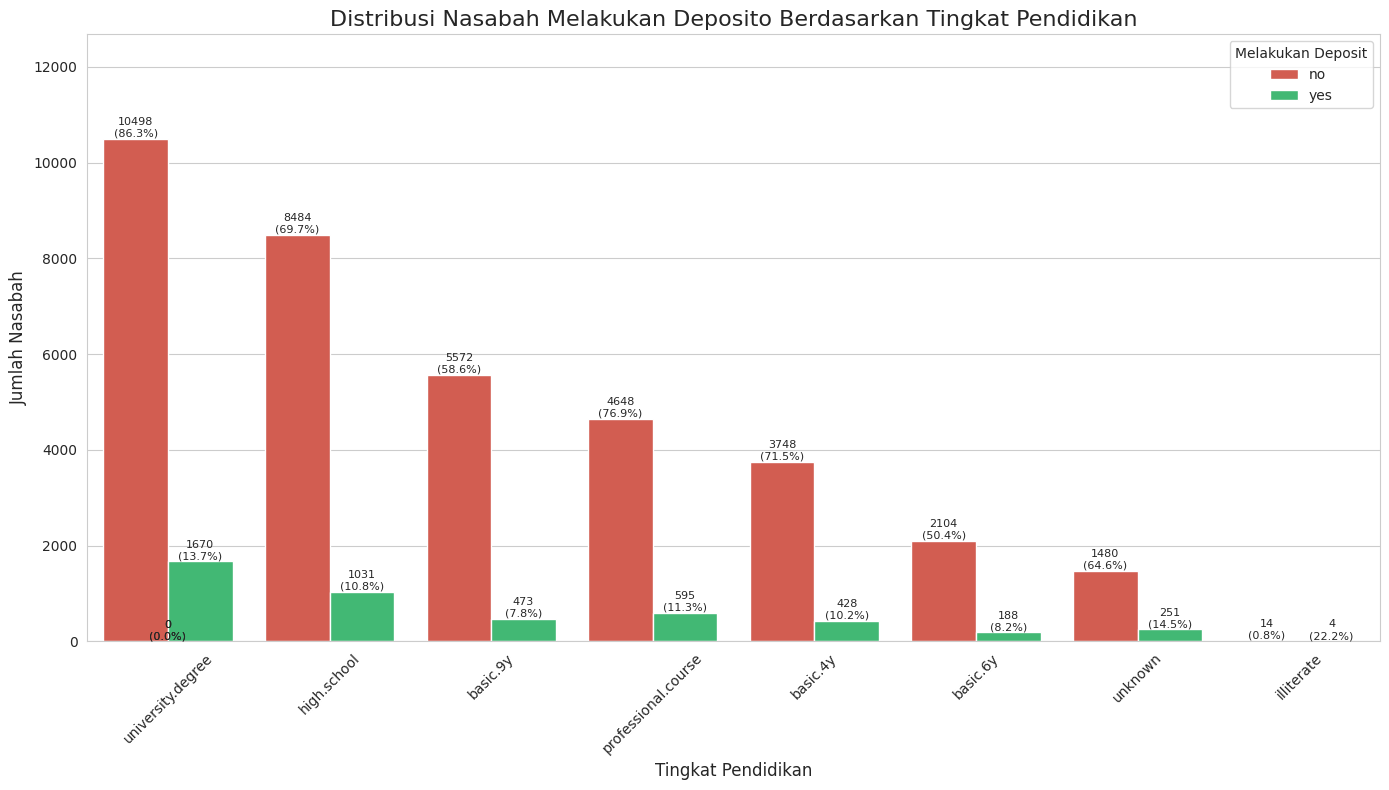

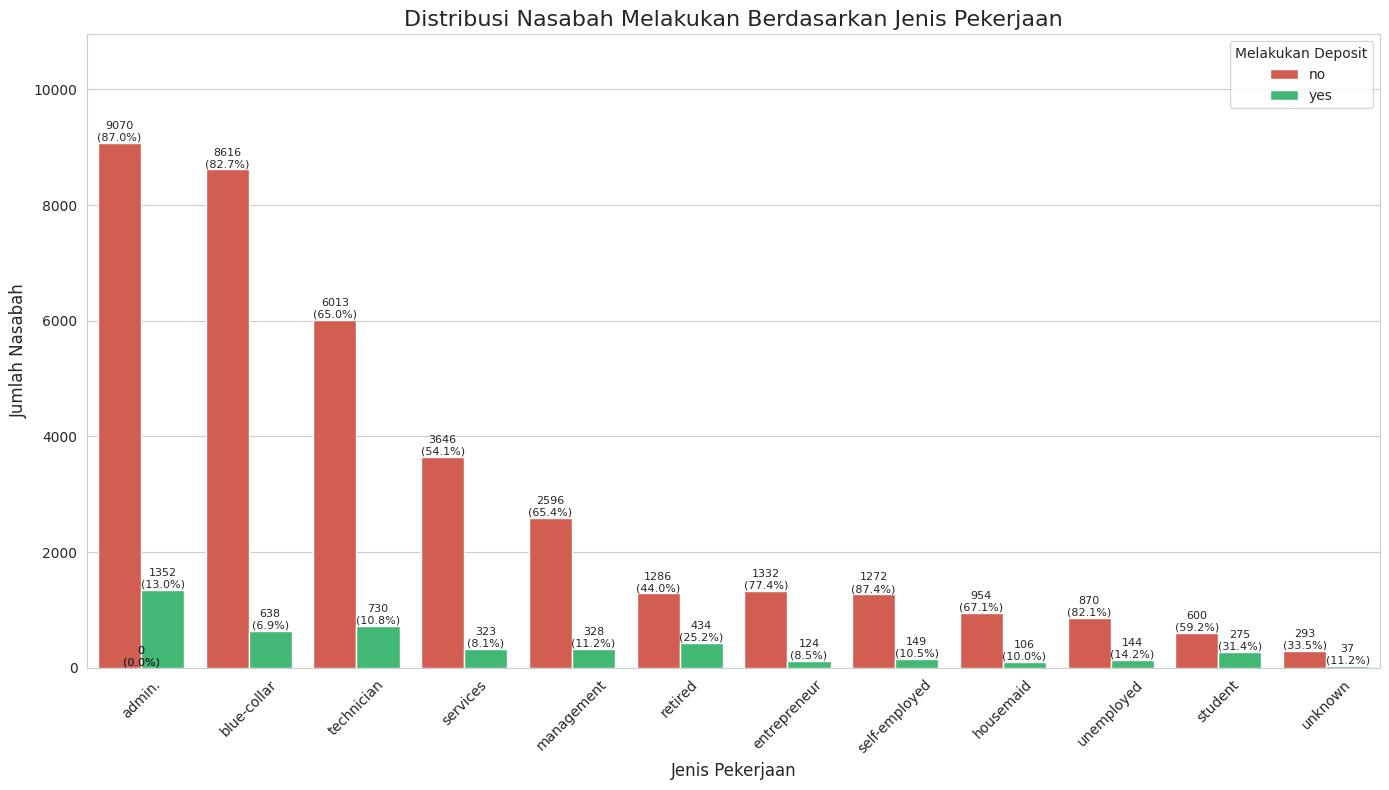

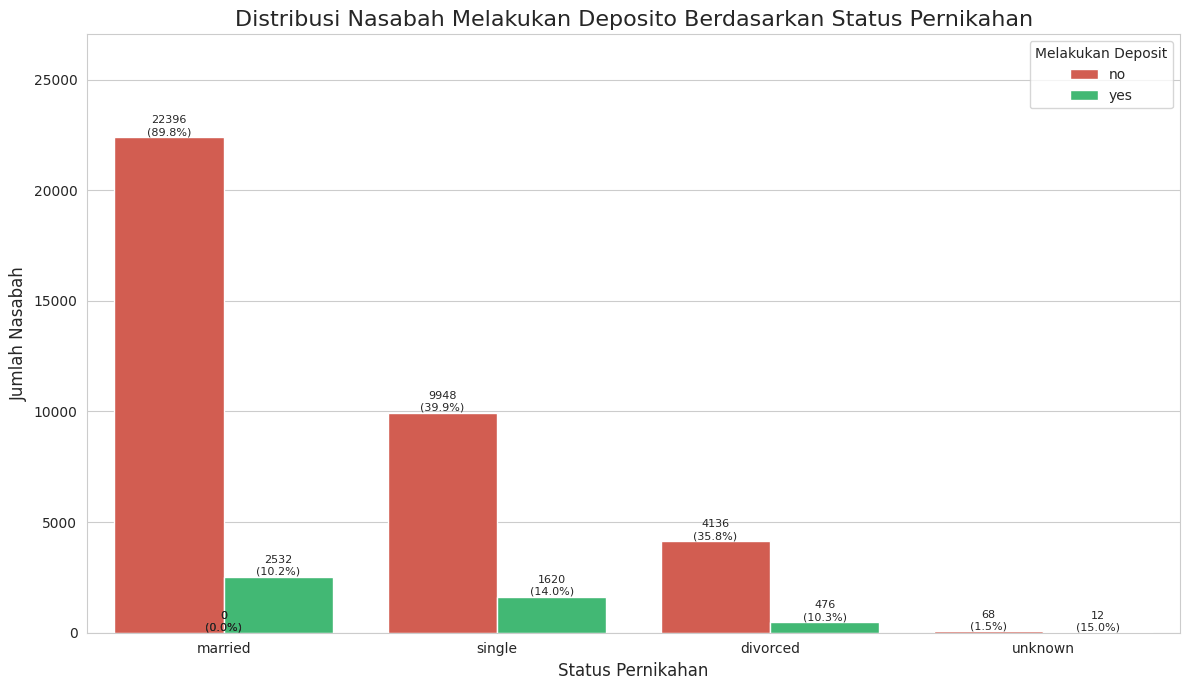

In [11]:
# 2. Pengaturan Umum untuk Visualisasi
# Mengatur tema dan palet warna agar konsisten.
sns.set_style("whitegrid")
palette = {"yes": "#2ecc71", "no": "#e74c3c"}

# 3. Fungsi Bantuan untuk Menambahkan Label
# Fungsi ini akan menghitung dan menambahkan teks (jumlah & persentase) ke setiap batang.
def add_labels(ax, feature):
    """Fungsi untuk menambahkan label jumlah dan persentase pada bar chart."""
    # Menghitung total untuk setiap kategori pada fitur yang diberikan
    totals = df[feature].value_counts()

    # Looping melalui setiap batang (patch) pada plot
    for p in ax.patches:
        # Mendapatkan tinggi batang (ini adalah jumlah absolut)
        height = p.get_height()
        
        # Mendapatkan nama kategori dari posisi x pada batang
        # Ini diperlukan untuk mencari total kategori
        category_name = ax.get_xticklabels()[int(p.get_x() + p.get_width() / 2)].get_text()
        
        # Mengambil total untuk kategori spesifik
        total = totals[category_name]
        
        # Menghitung persentase
        percentage = (height / total) * 100
        
        # Menambahkan teks ke atas batang
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 5,  # Atur posisi vertikal sedikit di atas batang
                f'{int(height)}\n({percentage:.1f}%)', # Format teks: Jumlah (Persen%)
                ha="center", va="bottom", fontsize=8)

# --- 4. Membuat Plot untuk 'Education' ---
# Membuat figure dan axes untuk plot
fig1, ax1 = plt.subplots(figsize=(14, 8))
# Membuat countplot menggunakan seaborn
sns.countplot(ax=ax1, data=df, x='education', hue='y', order=df['education'].value_counts().index, palette=palette)
# Mengatur judul dan label
ax1.set_title('Distribusi Nasabah Melakukan Deposito Berdasarkan Tingkat Pendidikan', fontsize=16)
ax1.set_xlabel('Tingkat Pendidikan', fontsize=12)
ax1.set_ylabel('Jumlah Nasabah', fontsize=12)
ax1.tick_params(axis='x', rotation=45) # Memutar label x agar tidak tumpang tindih
ax1.legend(title='Melakukan Deposit')
# Memanggil fungsi untuk menambahkan label
add_labels(ax1, 'education')
# Menyesuaikan batas atas sumbu y agar label tidak terpotong
ax1.set_ylim(0, ax1.get_ylim()[1] * 1.15)
# Merapikan layout dan menyimpan gambar
plt.tight_layout()


# --- 5. Membuat Plot untuk 'Job' ---
fig2, ax2 = plt.subplots(figsize=(14, 8))
sns.countplot(ax=ax2, data=df, x='job', hue='y', order=df['job'].value_counts().index, palette=palette)
ax2.set_title('Distribusi Nasabah Melakukan Berdasarkan Jenis Pekerjaan', fontsize=16)
ax2.set_xlabel('Jenis Pekerjaan', fontsize=12)
ax2.set_ylabel('Jumlah Nasabah', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Melakukan Deposit')
add_labels(ax2, 'job')
ax2.set_ylim(0, ax2.get_ylim()[1] * 1.15)
plt.tight_layout()



# --- 6. Membuat Plot untuk 'Marital' ---
fig3, ax3 = plt.subplots(figsize=(12, 7))
sns.countplot(ax=ax3, data=df, x='marital', hue='y', order=df['marital'].value_counts().index, palette=palette)
ax3.set_title('Distribusi Nasabah Melakukan Deposito Berdasarkan Status Pernikahan', fontsize=16)
ax3.set_xlabel('Status Pernikahan', fontsize=12)
ax3.set_ylabel('Jumlah Nasabah', fontsize=12)
ax3.legend(title='Melakukan Deposit')
add_labels(ax3, 'marital')
ax3.set_ylim(0, ax3.get_ylim()[1] * 1.15)
plt.tight_layout()

dari data diatas terlihat bahwa:
1. jika kita lihat nasabah yang masih menjadi 'student' memiliki proporsi deposito yang paling besar jika dibandingkan jumlah nasabah dari 'student' itu sendiri, namun jika dilihat dari total deposito keseluruhan, nasabah yang bekerja sebagai 'admin' lah yang memiliki porsi deposito yang paling banyak, hal ini wajar saja karena nasabah didominasi dari kalangan 'admin'.
2. nasabah yang berstatus 'single' memiliki potensi deposito yang paling besar hal ini cukup masuk akal dikarenakan seorang yang masih berstatus 'single' memiliki tanggung jawab finansial yang minim, namun jika dilihat dari proporsinya, yang terbesar ialah yang berstatus 'married'.
3. nasabah yang memiliki education 'university.degree' memiliki potensi deposito serta proporsi yang paling besar dibanding yang lain (mengecualikan kalangan illiterated dikarenakan hanya sedikit saja nasabah yang berasal dari kalangan tersebut), hal ini cukup wajar, dikarenakan lulusan universitas sendiri memiliki pendapatan serta kesejahteraan finansial yang lebih tinggi, sesuai dengan artikel ini https://www.aplu.org/our-work/4-policy-and-advocacy/publicuvalues/employment-earnings/
4. nasabah yang memiliki tanggungan 'housing' dan tidak memiliki 'loan' memiliki potensi dan proporsi yang paling tinggi untuk melakukan deposito, hal ini cukup wajar, dikarenakan nasabah hanya memiliki tanggungan 'housing' dan tidak memiliki tanggungan 'loan' otomatis tanggungan yang dimiliki tidak sebesar yang memiliki keduanya
5. bulan ke 5 atau bulan mei menjadi bulan yang banyak porsi nasabah yang melakukan deposito, selain itu pada bulan tersebut juga memiliki jumlah penawaran untuk melakukan deposito yang paling tinggi, hal ini kami asumsikan pada bulan tersebut diadakan program pemasaran besar-besaran, oleh karena itu jumlahnya melonjak tajam